# A tutorial on Numpy 3D arrays, Correlation of 3D arrays using Scipy.signal ,Tensorflow and nested for loop on numpy 3D arrays.

See [this](https://stackoverflow.com/questions/28010860/slicing-3d-numpy-arrays/28010900#28010900) 
     to slice numy 3D arrays.

In [26]:
import numpy as np
from scipy import signal
import warnings
import matplotlib.pyplot as plt
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    import tensorflow as tf
from scipy import sparse
from scipy.sparse import find
import pickle
sess = tf.Session()

A = np.arange(2*3*4).reshape((2,3,4))
print('shape of A is {}'.format(A.shape))
B = np.arange(2*3*4).reshape((2,3,4))
print('shape of B is {}'.format(B.shape))
C = A*B
print('C is the Hadamard product of A and B')
print('shape of C is {}'.format(C.shape))

shape of A is (2, 3, 4)
shape of B is (2, 3, 4)
C is the Hadamard product of A and B
shape of C is (2, 3, 4)


    If size of an array is (2,3,4) then imagine a 3D space with 2 units along +y axis, 3 units along +x axis and 4 along -z axis. You can split this space by slicing across any axes you want, lets slice it across -z axis, so we will endup with 4 (2,3) planes, these planes are in (x,y) directions.
         -z
    +y  /  
    |  /
    | /
    |/_ _ +x
    
    
    +y        +y
    |         |
    |         |
    |_ _ +x   |_ _ +x ... 4 such planes. If you stack these planes one behind the other then you get a 2x3x4 
    space.
    
    Let's print these 4 (2,3) planes.

In [ ]:
for i in range(4):
    print('x-y plane {}:\n{} and its shape is {}\n'.format(i,C[:,:,i],C[:,:,i].shape))

    Now that we had an introduction to 3D numpy arrays let's do an application.
    Let's correlate("convolve") an image of size (11,11,4) with a kernel (5,5,4). We have 2 output maps of 
    size (7,7). 
        Note: 11-5+1 = 7, because we're ignoring the edges of the convolution. 
        
    Since we have 2 output images, we need 2 kernels of size (5,5,4). 
    

In [28]:
image = np.arange(11*11*4).reshape((11,11,4))
kernel1 = np.arange(5*5*4).reshape((5,5,4))
kernel2 = np.random.rand(5,5,4)

    Image is a 3D array, to see how the first slice across the -z axis looks, use:
    print(image[:,:,0])
    [[  0   4   8  12  16  20  24  28  32  36  40]
     [ 44  48  52  56  60  64  68  72  76  80  84]
     [ 88  92  96 100 104 108 112 116 120 124 128]
     [132 136 140 144 148 152 156 160 164 168 172]
     [176 180 184 188 192 196 200 204 208 212 216]
     [220 224 228 232 236 240 244 248 252 256 260]
     [264 268 272 276 280 284 288 292 296 300 304]
     [308 312 316 320 324 328 332 336 340 344 348]
     [352 356 360 364 368 372 376 380 384 388 392]
     [396 400 404 408 412 416 420 424 428 432 436]
     [440 444 448 452 456 460 464 468 472 476 480]]
     
     This is the first (x,y) plane and there are 3 more such planes.
     
     To access 5x5x4 chunks for convolution, use
     for i in range(7):
        x=[0,5] ##we use [0,5] because shape of kernel is 5x5 in a x-y plane.
        conv = image[x[0]+i:x[1]+i,x[0]:x[1],:,]
        
     Remember that by iterating over the first index we're travelling down the +y axis.
     To see the first (x,y) plane on variable(conv), use print(conv[:,:,0])
     

In [29]:
for i in range(7):
    x=[0,5]
    conv = image[x[0]+i:x[1]+i,x[0]:x[1],:,]
    print(conv.shape)
    print(conv[:,:,0])

(5, 5, 4)
[[  0   4   8  12  16]
 [ 44  48  52  56  60]
 [ 88  92  96 100 104]
 [132 136 140 144 148]
 [176 180 184 188 192]]
(5, 5, 4)
[[ 44  48  52  56  60]
 [ 88  92  96 100 104]
 [132 136 140 144 148]
 [176 180 184 188 192]
 [220 224 228 232 236]]
(5, 5, 4)
[[ 88  92  96 100 104]
 [132 136 140 144 148]
 [176 180 184 188 192]
 [220 224 228 232 236]
 [264 268 272 276 280]]
(5, 5, 4)
[[132 136 140 144 148]
 [176 180 184 188 192]
 [220 224 228 232 236]
 [264 268 272 276 280]
 [308 312 316 320 324]]
(5, 5, 4)
[[176 180 184 188 192]
 [220 224 228 232 236]
 [264 268 272 276 280]
 [308 312 316 320 324]
 [352 356 360 364 368]]
(5, 5, 4)
[[220 224 228 232 236]
 [264 268 272 276 280]
 [308 312 316 320 324]
 [352 356 360 364 368]
 [396 400 404 408 412]]
(5, 5, 4)
[[264 268 272 276 280]
 [308 312 316 320 324]
 [352 356 360 364 368]
 [396 400 404 408 412]
 [440 444 448 452 456]]


In [30]:
print(image[:,:,0])
print('This is the first x-y plane of the input tensor image, there are 3 more such x-y planes stacked behind')

[[  0   4   8  12  16  20  24  28  32  36  40]
 [ 44  48  52  56  60  64  68  72  76  80  84]
 [ 88  92  96 100 104 108 112 116 120 124 128]
 [132 136 140 144 148 152 156 160 164 168 172]
 [176 180 184 188 192 196 200 204 208 212 216]
 [220 224 228 232 236 240 244 248 252 256 260]
 [264 268 272 276 280 284 288 292 296 300 304]
 [308 312 316 320 324 328 332 336 340 344 348]
 [352 356 360 364 368 372 376 380 384 388 392]
 [396 400 404 408 412 416 420 424 428 432 436]
 [440 444 448 452 456 460 464 468 472 476 480]]
This is the first x-y plane of the input tensor image, there are 3 more such x-y planes stacked behind


    We start at top left side of the 11x11x4 image and move on horizontally with a stride of 1 and when we reach
    the end we go down vertically with a stride of 1 and again move towards right as said above. 
    Each of these movements will result in tensors of size 5x5x4 and we use them to do hadamard product with the k-ernel tensor.
    Let's see the first slice  across the -z axis of that 5x5x4 tensor(part of an image).
    
    x=[0,5] 
    for i in range(7):
        for j in range(7):
            conv = image[x[0]+i:x[1]+i,x[0]+j:x[1]+j,:,]
            print(j,i)
            print(conv[:,:,0])
    will print:
    0 0 -----------------> this means top left
    [[  0   4   8  12  16]
     [ 44  48  52  56  60]
     [ 88  92  96 100 104]
     [132 136 140 144 148]
     [176 180 184 188 192]]
    1 0
    [[  4   8  12  16  20]
     [ 48  52  56  60  64]
     [ 92  96 100 104 108]
     [136 140 144 148 152]
     [180 184 188 192 196]]
    2 0
    [[  8  12  16  20  24]
     [ 52  56  60  64  68]
     [ 96 100 104 108 112]
     [140 144 148 152 156]
     [184 188 192 196 200]]
    3 0
    [[ 12  16  20  24  28]
     [ 56  60  64  68  72]
     [100 104 108 112 116]
     [144 148 152 156 160]
     [188 192 196 200 204]]
    4 0
    [[ 16  20  24  28  32]
     [ 60  64  68  72  76]
     [104 108 112 116 120]
     [148 152 156 160 164]
     [192 196 200 204 208]]
    6 0   -----------------> this means top right
    [[ 24  28  32  36  40]
     [ 68  72  76  80  84]
     [112 116 120 124 128]
     [156 160 164 168 172]
     [200 204 208 212 216]]
     .
     .
     .
     0 6  -----------------> this means bottom left
    [[264 268 272 276 280]
     [308 312 316 320 324]
     [352 356 360 364 368]
     [396 400 404 408 412]
     [440 444 448 452 456]]
    1 6
    [[268 272 276 280 284]
     [312 316 320 324 328]
     [356 360 364 368 372]
     [400 404 408 412 416]
     [444 448 452 456 460]]
    2 6
    [[272 276 280 284 288]
     [316 320 324 328 332]
     [360 364 368 372 376]
     [404 408 412 416 420]
     [448 452 456 460 464]]
    3 6
    [[276 280 284 288 292]
     [320 324 328 332 336]
     [364 368 372 376 380]
     [408 412 416 420 424]
     [452 456 460 464 468]]
    4 6
    [[280 284 288 292 296]
     [324 328 332 336 340]
     [368 372 376 380 384]
     [412 416 420 424 428]
     [456 460 464 468 472]]
    5 6
    [[284 288 292 296 300]
     [328 332 336 340 344]
     [372 376 380 384 388]
     [416 420 424 428 432]
     [460 464 468 472 476]]
    6 6  -----------------> this means bottom right
    [[288 292 296 300 304]
     [332 336 340 344 348]
     [376 380 384 388 392]
     [420 424 428 432 436]
     [464 468 472 476 480]]


In [31]:
#Click on the 3 dots below to see further
x=[0,5]  
for i in range(7):
    for j in range(7):
        conv = image[x[0]+i:x[1]+i,x[0]+j:x[1]+j,:,]
        print(j,i)
        print(conv[:,:,0])
       

0 0
[[  0   4   8  12  16]
 [ 44  48  52  56  60]
 [ 88  92  96 100 104]
 [132 136 140 144 148]
 [176 180 184 188 192]]
1 0
[[  4   8  12  16  20]
 [ 48  52  56  60  64]
 [ 92  96 100 104 108]
 [136 140 144 148 152]
 [180 184 188 192 196]]
2 0
[[  8  12  16  20  24]
 [ 52  56  60  64  68]
 [ 96 100 104 108 112]
 [140 144 148 152 156]
 [184 188 192 196 200]]
3 0
[[ 12  16  20  24  28]
 [ 56  60  64  68  72]
 [100 104 108 112 116]
 [144 148 152 156 160]
 [188 192 196 200 204]]
4 0
[[ 16  20  24  28  32]
 [ 60  64  68  72  76]
 [104 108 112 116 120]
 [148 152 156 160 164]
 [192 196 200 204 208]]
5 0
[[ 20  24  28  32  36]
 [ 64  68  72  76  80]
 [108 112 116 120 124]
 [152 156 160 164 168]
 [196 200 204 208 212]]
6 0
[[ 24  28  32  36  40]
 [ 68  72  76  80  84]
 [112 116 120 124 128]
 [156 160 164 168 172]
 [200 204 208 212 216]]
0 1
[[ 44  48  52  56  60]
 [ 88  92  96 100 104]
 [132 136 140 144 148]
 [176 180 184 188 192]
 [220 224 228 232 236]]
1 1
[[ 48  52  56  60  64]
 [ 92  96 100

    Now that we know how to slice the 3D array for correlation("convolution"), it's time to do the actual correlation("convolution").
    Each conv variable(5x5x4) will be "hadamard producted" with the kernel vector(5x5x4) and the resultant
    will be summed, sum of the each product will result in a scalar.
    
    Since we have 2 output maps, we endup convolving the input tensor with 2 kernels. So we need 2 result
    arrays to store the resulting scalars.

In [32]:
result1 = []
result2=[]
x=[0,5]  
for i in range(7):
    for j in range(7):
        conv = image[x[0]+i:x[1]+i,x[0]+j:x[1]+j,:,]
        #print(j,i)
        hp1 = conv*kernel1
        if(i==0 and j==0):
            print('one of the input 5x5x4 conv variables \n {}'.format(conv))
            print('\n')
            print('kernel \n {}'.format(kernel1))
            print('\n')
            print('hadamard product \n {}'.format(hp1))
            print('\n')
            print('sum of hp, this should be the first element in the resultant 7x7 map \n {}'.format(np.sum(hp1)))
            print('\n')
        hp_sum1 = np.sum(hp1)
        result1.append(hp_sum1)
        hp2 = conv*kernel2
        hp_sum2 = np.sum(hp2)
        result2.append(hp_sum2)
result1=np.asarray(result1).reshape(7,7)
result2=np.asarray(result2).reshape(7,7)
print('The resultant (7,7) map1 is: \n{}\n'.format(result1))

print('The resultant (7,7) map2 is:\n{}\n'.format(result2))

one of the input 5x5x4 conv variables 
 [[[  0   1   2   3]
  [  4   5   6   7]
  [  8   9  10  11]
  [ 12  13  14  15]
  [ 16  17  18  19]]

 [[ 44  45  46  47]
  [ 48  49  50  51]
  [ 52  53  54  55]
  [ 56  57  58  59]
  [ 60  61  62  63]]

 [[ 88  89  90  91]
  [ 92  93  94  95]
  [ 96  97  98  99]
  [100 101 102 103]
  [104 105 106 107]]

 [[132 133 134 135]
  [136 137 138 139]
  [140 141 142 143]
  [144 145 146 147]
  [148 149 150 151]]

 [[176 177 178 179]
  [180 181 182 183]
  [184 185 186 187]
  [188 189 190 191]
  [192 193 194 195]]]


kernel 
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]
  [16 17 18 19]]

 [[20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]
  [32 33 34 35]
  [36 37 38 39]]

 [[40 41 42 43]
  [44 45 46 47]
  [48 49 50 51]
  [52 53 54 55]
  [56 57 58 59]]

 [[60 61 62 63]
  [64 65 66 67]
  [68 69 70 71]
  [72 73 74 75]
  [76 77 78 79]]

 [[80 81 82 83]
  [84 85 86 87]
  [88 89 90 91]
  [92 93 94 95]
  [96 97 98 99]]]


hadamard product 
 [[[    0

   Let's do the same application as above using numpy/scipy. 3D correlation("Convolution") using numpy/scipy.

   See [scipy.signal.correlate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html)

In [33]:

result1 = signal.correlate(image,kernel1,mode='valid',method='fft') ##DON'T USE SIGNAL.CONVOLVE!!!
#modes availabe are valid, same
zx=np.sum(result1,axis=2) #We're summing across -z axis
print(zx)
print(zx.shape)

[[ 661950  681750  701550  721350  741150  760950  780750]
 [ 879750  899550  919350  939150  958950  978750  998550]
 [1097550 1117350 1137150 1156950 1176750 1196550 1216350]
 [1315350 1335150 1354950 1374750 1394550 1414350 1434150]
 [1533150 1552950 1572750 1592550 1612350 1632150 1651950]
 [1750950 1770750 1790550 1810350 1830150 1849950 1869750]
 [1968750 1988550 2008350 2028150 2047950 2067750 2087550]]
(7, 7)


In [34]:
from scipy import signal
result2 = signal.correlate(image,kernel2,mode='valid',method='fft') ##DON'T USE SIGNAL.CONVOLVE!!!
#modes available are valid, same
zx=np.sum(result2,axis=2) #We're summing across -z axis
print(zx)
print(zx.shape)

[[ 4783.06271483  4978.90073038  5174.73874593  5370.57676148
   5566.41477703  5762.25279258  5958.09080813]
 [ 6937.28088588  7133.11890143  7328.95691698  7524.79493253
   7720.63294808  7916.47096363  8112.30897918]
 [ 9091.49905693  9287.33707248  9483.17508803  9679.01310358
   9874.85111913 10070.68913468 10266.52715023]
 [11245.71722798 11441.55524353 11637.39325908 11833.23127463
  12029.06929018 12224.90730573 12420.74532128]
 [13399.93539903 13595.77341458 13791.61143013 13987.44944568
  14183.28746123 14379.12547678 14574.96349233]
 [15554.15357008 15749.99158563 15945.82960118 16141.66761673
  16337.50563228 16533.34364783 16729.18166338]
 [17708.37174113 17904.20975668 18100.04777223 18295.88578778
  18491.72380333 18687.56181888 18883.39983443]]
(7, 7)


    we can verify that the above 2 results using numpy/scipy are same as the results abotained from using
    a nested for loop.

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.correlate.html
from scipy import ndimage
result1 = ndimage.filters.correlate(image,kernel1,mode='constant') 
#mode : {‘reflect’,’constant’,’nearest’,’mirror’, ‘wrap’}
print(result1.shape)
zx=np.sum(result1,axis=2)
print(zx)
print(zx.shape)

In [ ]:
from scipy import ndimage
result2 = ndimage.filters.correlate(image,kernel2,mode='constant') 
#mode : {‘reflect’,’constant’,’nearest’,’mirror’, ‘wrap’}
print(result2.shape)
zx=np.sum(result2,axis=2)
print(zx)
print(zx.shape)

    We can see that results from scipy.ndimage.filters.correlate are not same as scipy.signal.correlate, 
    this is because in the case of boundaries, former method deals in a different way. So, the former 
    method cannot be employed if we want to ignore the boundaries.  

3D convolution using Tensorflow
See [this](https://stackoverflow.com/questions/42883547/what-do-you-mean-by-1d-2d-and-3d-convolutions-in-cnn)
and [this](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)

In [ ]:
sess = tf.Session()

In [36]:
in_channels = 4 # 4 because our image has 4 units in the -z direction. 
ones_3d = image # input is 3d, in_channels = 4
# filter must have 3d-shpae with in_channels
weight_3d = kernel1
strides_2d = [1, 1, 1, 1]

in_3d = tf.constant(ones_3d, dtype=tf.float32)
filter_3d = tf.constant(weight_3d, dtype=tf.float32)

in_width = int(in_3d.shape[0])
in_height = int(in_3d.shape[1])

filter_width = int(filter_3d.shape[0])
filter_height = int(filter_3d.shape[1])

input_3d   = tf.reshape(in_3d, [1, in_height, in_width, in_channels])
kernel_3d = tf.reshape(filter_3d, [filter_height, filter_width, in_channels, 1])
inter = tf.nn.conv2d(input_3d, kernel_3d, strides=strides_2d, padding='VALID')
print(inter.shape)
output_2d = tf.squeeze(inter)
print(sess.run(output_2d))
print(output_2d.shape)

(1, 7, 7, 1)
[[ 661950.  681750.  701550.  721350.  741150.  760950.  780750.]
 [ 879750.  899550.  919350.  939150.  958950.  978750.  998550.]
 [1097550. 1117350. 1137150. 1156950. 1176750. 1196550. 1216350.]
 [1315350. 1335150. 1354950. 1374750. 1394550. 1414350. 1434150.]
 [1533150. 1552950. 1572750. 1592550. 1612350. 1632150. 1651950.]
 [1750950. 1770750. 1790550. 1810350. 1830150. 1849950. 1869750.]
 [1968750. 1988550. 2008350. 2028150. 2047950. 2067750. 2087550.]]
(7, 7)


In [ ]:
in_channels = 4 # 4 because our image has 4 units in the -z direction. 
ones_3d = image # input is 3d, in_channels = 4
# kernels must have 3d-shape with in_channels
weight_3d = kernel2
strides_2d = [1, 1, 1, 1]

in_3d = tf.constant(ones_3d, dtype=tf.float32)
filter_3d = tf.constant(weight_3d, dtype=tf.float32)

in_width = int(in_3d.shape[0])
in_height = int(in_3d.shape[1])

filter_width = int(filter_3d.shape[0])
filter_height = int(filter_3d.shape[1])

input_3d   = tf.reshape(in_3d, [1, in_height, in_width, in_channels])
kernel_3d = tf.reshape(filter_3d, [filter_height, filter_width, in_channels, 1])

output_2d = tf.squeeze(tf.nn.conv2d(input_3d, kernel_3d, strides=strides_2d, padding='VALID'))
print(sess.run(output_2d))
print(output_2d.shape)

    You can see that the above 2 results from tensorflow are same as the results obtained from 
    nested for loop and scipy.signal.correlate. 

    Now let's calculate the above 2 results in a single operation.  We had 2 kernels corresponding to 2 
    output maps and we calculated the correlations separately but Tensor flow can do that in one 
    operation, if we can increasing the dimensions of the kernel tensor by adding a new axis.
    See for more information on stack 
   see [this](https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html)

In [ ]:
in_channels = 4
out_channels = 2
ones_3d = image
# kernels must have 3d-shape x number of filters = 4D
kernel12=np.stack((kernel1,kernel2),axis=-1)
weight_4d = kernel12
strides_2d = [1, 1, 1, 1]

in_3d = tf.constant(ones_3d, dtype=tf.float32)
filter_4d = tf.constant(weight_4d, dtype=tf.float32)

in_width = int(in_3d.shape[0])
in_height = int(in_3d.shape[1])

filter_width = int(filter_4d.shape[0])
filter_height = int(filter_4d.shape[1])

input_3d   = tf.reshape(in_3d, [1, in_height, in_width, in_channels])
kernel_4d = tf.reshape(filter_4d, [filter_height, filter_width, in_channels, out_channels])

#output stacked shape is 3D = 2D x N matrix
output_3d = tf.nn.conv2d(input_3d, kernel_4d, strides=strides_2d, padding='VALID')
print('Shape of output_3d {}\n'.format(output_3d.shape))
print('shape of output_3d[0]',output_3d[0].shape)
print('Individual outputs\n')
for i in range(2):
    print('Map{} is:'.format(i+1))
    print(sess.run(output_3d[:,:,:,i]))
    print('\n')
print('Combined Output:')
print(sess.run(output_3d[0]))


# Timing Analysis(Larger tensors)
Let's see which of the 3 methods described above does better in terms of timing

In [ ]:
sizes1=121
image = np.arange(sizes1*sizes1*4).reshape((sizes1,sizes1,4))
kernel1 = np.arange(5*5*4).reshape((5,5,4))
kernel2 = np.random.rand(5,5,4)
temp = sizes1-5+1

# Nested for loop

In [ ]:
def nested():
    result1 = []
    result2=[]
    x=[0,5]  
    for i in range(temp):
        for j in range(temp):
            conv = image[x[0]+i:x[1]+i,x[0]+j:x[1]+j,:,]
            hp1 = conv*kernel1
            hp_sum1 = np.sum(hp1)
            result1.append(hp_sum1)
            hp2 = conv*kernel2
            hp_sum2 = np.sum(hp2)
            result2.append(hp_sum2)
    result1=np.asarray(result1).reshape(temp,temp)
    result2=np.asarray(result2).reshape(temp,temp)
    return result1, result2

In [ ]:
n = 15        # Number of loops
r = 1      # Number of repetitions of each loop
p = 6        # Display precision
outputs = []
t1 = %timeit -n $n -r $r -p $p -o pass; outputs.append(nested())
for i in range(2):
    print('Map{} is:'.format(i+1))
    print(outputs[0][i])
    print('\n')
t1 = t1.average*1000
print("{:>20s} {:.4f}".format("Average time (ms)",t1))

# Scipy.signal.correlate

In [ ]:
def using_scipy():
    result1 = signal.correlate(image,kernel1,mode='valid',method='fft') ##DON'T USE SIGNAL.CONVOLVE!!!
    #modes availabe are valid, same
    result1=np.sum(result1,axis=2) #We're summing across -z axis
    result2 = signal.correlate(image,kernel2,mode='valid',method='fft') ##DON'T USE SIGNAL.CONVOLVE!!!
    #modes availabe are valid, same
    result2=np.sum(result2,axis=2)
    return result1, result2

In [ ]:
n = 15        # Number of loops
r = 1      # Number of repetitions of each loop
p = 6        # Display precision
outputs = []
t2 = %timeit -n $n -r $r -p $p -o pass; outputs.append(using_scipy())
for i in range(2):
    print('Map{} is:'.format(i+1))
    print(outputs[0][i])
    print('\n')
t2 = t2.average*1000
print("{:>20s} {:.4f}".format("Average time (ms)",t2))

# Tensorflow

In [ ]:
def using_tf():
    in_channels = 4
    out_channels = 2
    ones_3d = image
    # kernels must have 3d-shape x number of filters = 4D
    kernel12=np.stack((kernel1,kernel2),axis=-1)
    weight_4d = kernel12
    strides_2d = [1, 1, 1, 1]

    in_3d = tf.constant(ones_3d, dtype=tf.float32)
    filter_4d = tf.constant(weight_4d, dtype=tf.float32)

    in_width = int(in_3d.shape[0])
    in_height = int(in_3d.shape[1])

    filter_width = int(filter_4d.shape[0])
    filter_height = int(filter_4d.shape[1])

    input_3d   = tf.reshape(in_3d, [1, in_height, in_width, in_channels])
    kernel_4d = tf.reshape(filter_4d, [filter_height, filter_width, in_channels, out_channels])

    #output stacked shape is 3D = 2D x N matrix
    output_3d = tf.nn.conv2d(input_3d, kernel_4d, strides=strides_2d, padding='VALID',use_cudnn_on_gpu=False)
    return sess.run(output_3d)

In [ ]:
n = 15        # Number of loops
r = 1      # Number of repetitions of each loop
p = 6        # Display precision
outputs=[]
t3 = %timeit -n $n -r $r -p $p -o pass; outputs.append(using_tf())
for i in range(2):
    print('Map{} is:'.format(i+1))
    print(outputs[0][:,:,:,i])
    print('\n')
t3 = t3.average*1000
print("{:>20s} {:.4f}".format("Average time (ms)",t3))

# Timing plots

In [ ]:
import pandas as p
import matplotlib.pyplot as plt
df = p.DataFrame({'Times' : [t1,t2,t3]})
df = df.rename(index={2: 'tensorflow',1:'scipy.singal.correlate',0:'Nested for loop'})
print('Timings for the three methods (ms)')
display(df)

ax = df[['Times']].plot(kind='bar', title ="Times", figsize=(5, 5), legend=True, fontsize=12)
ax.set_ylabel("Time(ms)", fontsize=10)
plt.show()

    You can see that TF performed the best and loop the worst. Use TF if you have larger tensors.

# Timing Analysis(Smaller tensors)
Let's see which of the 3 methods described above does better in terms of timing

In [ ]:
sizes1=11
image = np.arange(sizes1*sizes1*4).reshape((sizes1,sizes1,4))
kernel1 = np.arange(5*5*4).reshape((5,5,4))
kernel2 = np.random.rand(5,5,4)
temp = sizes1-5+1

# Nested For Loop

In [ ]:
def nested():
    result1 = []
    result2=[]
    x=[0,5]  
    for i in range(temp):
        for j in range(temp):
            conv = image[x[0]+i:x[1]+i,x[0]+j:x[1]+j,:,]
            hp1 = conv*kernel1
            hp_sum1 = np.sum(hp1)
            result1.append(hp_sum1)
            hp2 = conv*kernel2
            hp_sum2 = np.sum(hp2)
            result2.append(hp_sum2)
    result1=np.asarray(result1).reshape(temp,temp)
    result2=np.asarray(result2).reshape(temp,temp)
    return result1, result2

In [ ]:
n = 15        # Number of loops
r = 1      # Number of repetitions of each loop
p = 6        # Display precision
outputs = []
t1_small = %timeit -n $n -r $r -p $p -o pass; outputs.append(nested())
for i in range(2):
    print('Map{} is:'.format(i+1))
    print(outputs[0][i])
    print('\n')
t1_small = t1_small.average*1000
print("{:>20s} {:.4f}".format("Average time (ms)",t1_small))

# Tensorflow

In [ ]:
def using_tf():
    in_channels = 4
    out_channels = 2
    ones_3d = image
    # kernels must have 3d-shape x number of filters = 4D
    kernel12=np.stack((kernel1,kernel2),axis=-1)
    weight_4d = kernel12
    strides_2d = [1, 1, 1, 1]

    in_3d = tf.constant(ones_3d, dtype=tf.float32)
    filter_4d = tf.constant(weight_4d, dtype=tf.float32)

    in_width = int(in_3d.shape[0])
    in_height = int(in_3d.shape[1])

    filter_width = int(filter_4d.shape[0])
    filter_height = int(filter_4d.shape[1])

    input_3d   = tf.reshape(in_3d, [1, in_height, in_width, in_channels])
    kernel_4d = tf.reshape(filter_4d, [filter_height, filter_width, in_channels, out_channels])

    #output stacked shape is 3D = 2D x N matrix
    output_3d = tf.nn.conv2d(input_3d, kernel_4d, strides=strides_2d, padding='VALID',use_cudnn_on_gpu=False)
    return sess.run(output_3d)

In [ ]:
n = 15        # Number of loops
r = 1      # Number of repetitions of each loop
p = 6        # Display precision
outputs=[]
t3_small = %timeit -n $n -r $r -p $p -o pass; outputs.append(using_tf())
for i in range(2):
    print('Map{} is:'.format(i+1))
    print(outputs[0][:,:,:,i])
    print('\n')
t3_small = t3_small.average*1000
print("{:>20s} {:.4f}".format("Average time (ms)",t3_small))

# Scipy.signal.correlate

In [ ]:
def using_scipy():
    result1 = signal.correlate(image,kernel1,mode='valid',method='fft') ##DON'T USE SIGNAL.CONVOLVE!!!
    #modes availabe are valid, same
    result1=np.sum(result1,axis=2) #We're summing across -z axis
    result2 = signal.correlate(image,kernel2,mode='valid',method='fft') ##DON'T USE SIGNAL.CONVOLVE!!!
    #modes availabe are valid, same
    result2=np.sum(result2,axis=2)
    return result1, result2

In [ ]:
n = 15        # Number of loops
r = 1      # Number of repetitions of each loop
p = 6        # Display precision
outputs = []
t2_small = %timeit -n $n -r $r -p $p -o pass; outputs.append(using_scipy())
for i in range(2):
    print('Map{} is:'.format(i+1))
    print(outputs[0][i])
    print('\n')
t2_small = t2_small.average*1000
print("{:>20s} {:.4f}".format("Average time (ms)",t2_small))

# Timing plots

In [ ]:
import pandas as p
import matplotlib.pyplot as plt
df = p.DataFrame({'Times' : [t1_small,t2_small,t3_small]})
df = df.rename(index={2: 'tensorflow',1:'scipy.singal.correlate',0:'Nested for loop'})
print('Timings for the three methods (ms)')
display(df)

ax = df[['Times']].plot(kind='bar', title ="Times", figsize=(5, 5), legend=True, fontsize=12)
ax.set_ylabel("Time(ms)", fontsize=10)
plt.show()

    You can see that scipy performed the best and tensorflow the worst for smaller tensors. 
    

# Timing Analysis(Smal and sparse tensors)

# Some Misc codes with Tensorflow

`embedding_lookup` function retrieves rows of the params tensor. The behavior is similar to using 
 indexing with arrays in numpy.
 `tf.nn.embedding_lookup(params, ids, partition_strategy='mod', name=None)`
 
 [See](https://stackoverflow.com/questions/34870614/what-does-tf-nn-embedding-lookup-function-do) for more.
 
     In the 'mod' strategy, index 0 corresponds to the first element of the first tensor in the list. Index 1 corresponds to the first element of the second tensor. Index 2 corresponds to the first element of the third tensor, and so on. Simply index i corresponds to the first element of the (i+1)th tensor , for all the indexes 0..(n-1), assuming params is a list of n tensors.

        Now, index n cannot correspond to tensor n+1, because the list params contains only n tensors. So index n corresponds to the second element of the first tensor. Similarly, index n+1 corresponds to the second element of the second tensor, etc.

In [ ]:
matrix = np.random.random([1024, 64])  # 64-dimensional embeddings
ids = np.array([0, 5,])
print(matrix.shape)
#matrix[ids]
print('Embedding using Numpy: \n {}'.format(matrix[ids]))

params = tf.constant(matrix)
ids = tf.constant([0,5])
print('Embedding using TF: \n {}'.format(tf.nn.embedding_lookup(params,ids).eval(session=sess)))
#print(sess.run(tf.nn.embedding_lookup(params,ids))) #above line and this line are the same

In [ ]:
params1 = tf.constant([1,3])
params2 = tf.constant([10,20])
ids = tf.constant([2,0,2,1,2,3])
result = tf.nn.embedding_lookup([params1, params2], ids)
print(sess.run(result))

    index 0 corresponds to the first element of the first tensor: 1

    index 1 corresponds to the first element of the second tensor: 10

    index 2 corresponds to the second element of the first tensor: 3

    index 3 corresponds to the second element of the second tensor: 20

In [ ]:
x = tf.constant([[1.0,2.0,3.0],
                 [4.0,5.0,6.0],[7.0,8.0,9.0]])
y = tf.SparseTensor(indices=[[0, 0],[0,4], [1, 2],[3,3],[3,4],[4,0]], values=[1, 2,4,5,6,7], dense_shape=[5, 5])

In [ ]:
print(sess.run(x))
print(sess.run(tf.sparse_tensor_to_dense(y)))

In [ ]:
row_indices_ip=np.asarray([0,0,1,3,3,4])
col_indices_ip=np.asarray([0,4,2,3,4,0])
data_ip=np.asarray([1, 2,4,5,6,7])
shape =(5,5) 
A = sparse.csr_matrix((data_ip, (row_indices_ip, col_indices_ip)), shape=(5, 5))
print(A)
print('#############')
print('Lets see how we can access elements of the sparse array')
print(find(A))
print('#############')
dense_array= find(A)
row_indices_ip = dense_array[0].tolist()
col_indices_ip = dense_array[1].tolist()
elems_ip = dense_array[2].tolist()
print('row_indices_ip:',row_indices_ip)
print('col_indices_ip:',col_indices_ip)
coords_ip = [(row_indices_ip[i],col_indices_ip[i]) for i in range(len(row_indices_ip))]
print('coordinates:',coords_ip)
print('elements',elems_ip)
print('#############')
print('Lets convert this sparse array to dense')
print(A.toarray())

# Testing the regionclass class for all possible cases.
# testing for top left with 5x5 grid and 3x3 kernel

In [ ]:
import regionclass
r = regionclass.genregion(0,5,3)
row_indices1=r.GenRegion().flatten()//5
col_indices1=r.GenRegion().flatten()%5
print('grid_row_indices:{}'.format(row_indices1))
print('grid_col_indices:{}'.format(col_indices1))
con_coords1 = [(row_indices1[i],col_indices1[i]) for i in range(len(row_indices1))]
print('grid_coordinates:',con_coords1)
print('')
r = regionclass.genregion(0,5,3)
##print('points',r.GenKerRegion().flatten())
row_indices1=r.GenKerRegion().flatten()//3
col_indices1=r.GenKerRegion().flatten()%3
print('kernel_row_indices:{}'.format(row_indices1))
print('kernel_col_indices:{}'.format(col_indices1))
con_coords1 = [(row_indices1[i],col_indices1[i]) for i in range(len(row_indices1))]
print('kernel_coordinates:',con_coords1)
print('')

# testing for top right with 5x5 grid and 3x3 kernel

In [ ]:
r = regionclass.genregion(4,5,3)
row_indices2=r.GenRegion().flatten()//5
col_indices2=r.GenRegion().flatten()%5
print('grid_row_indices:{}'.format(row_indices2))
print('grid_col_indices:{}'.format(col_indices2))
con_coords2 = [(row_indices2[i],col_indices2[i]) for i in range(len(row_indices2))]
print('grid_coordinates:',con_coords2)
print('')
row_indices2=r.GenKerRegion().flatten()//3
col_indices2=r.GenKerRegion().flatten()%3
print('kernel_row_indices:{}'.format(row_indices2))
print('kernel_col_indices:{}'.format(col_indices2))
con_coords2 = [(row_indices2[i],col_indices2[i]) for i in range(len(row_indices2))]
print('grid_coordinates:',con_coords2)
print('')

# testing for bottom left with 5x5 grid and 3x3 kernel

In [ ]:
r = regionclass.genregion(20,5,3)
row_indices3=r.GenRegion().flatten()//5
col_indices3=r.GenRegion().flatten()%5
print('row_indices:{}'.format(row_indices3))
print('col_indices:{}'.format(col_indices3))
con_coords3 = [(row_indices3[i],col_indices3[i]) for i in range(len(row_indices3))]
print('coordinates:',con_coords3)
print('')
row_indices3=r.GenKerRegion().flatten()//3
col_indices3=r.GenKerRegion().flatten()%3
print('row_indices:{}'.format(row_indices3))
print('col_indices:{}'.format(col_indices3))
con_coords3 = [(row_indices3[i],col_indices3[i]) for i in range(len(row_indices3))]
print('coordinates:',con_coords3)
print('')

# testing for bottom right 5x5 grid and 3x3 kernel

In [ ]:
r = regionclass.genregion(24,5,3)
row_indices4=r.GenRegion().flatten()//5
col_indices4=r.GenRegion().flatten()%5
print('row_indices:{}'.format(row_indices4))
print('col_indices:{}'.format(col_indices4))
con_coords4 = [(row_indices4[i],col_indices4[i]) for i in range(len(row_indices4))]
print('coordinates:',con_coords4)
print('')
row_indices4=r.GenKerRegion().flatten()//3
col_indices4=r.GenKerRegion().flatten()%3
print('row_indices:{}'.format(row_indices4))
print('col_indices:{}'.format(col_indices4))
con_coords4 = [(row_indices4[i],col_indices4[i]) for i in range(len(row_indices4))]
print('coordinates:',con_coords4)
print('')

# testing for any case other than above for 5x5 grid and 3x3 kernel

In [ ]:
r = regionclass.genregion(10,5,3)
row_indices5=r.GenRegion().flatten()//5
col_indices5=r.GenRegion().flatten()%5
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')
row_indices5=r.GenKerRegion().flatten()//3
col_indices5=r.GenKerRegion().flatten()%3
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')

# testing for top left with 7x7 grid and 5x5 kernel

In [ ]:
r = regionclass.genregion(0,7,5)
row_indices5=r.GenRegion().flatten()//7
col_indices5=r.GenRegion().flatten()%7
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')
row_indices5=r.GenKerRegion().flatten()//5
col_indices5=r.GenKerRegion().flatten()%5
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')

# testing for top right with 7x7 grid and 5x5 kernel

In [ ]:
r = regionclass.genregion(6,7,5)
row_indices5=r.GenRegion().flatten()//7
col_indices5=r.GenRegion().flatten()%7
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')
row_indices5=r.GenKerRegion().flatten()//5
col_indices5=r.GenKerRegion().flatten()%5
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')

# testing for bottom left with 7x7 grid and 5x5 kernel

In [ ]:
r = regionclass.genregion(42,7,5)
row_indices5=r.GenRegion().flatten()//7
col_indices5=r.GenRegion().flatten()%7
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')
row_indices5=r.GenKerRegion().flatten()//5
col_indices5=r.GenKerRegion().flatten()%5
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')

# testing for bottom right with 7x7 grid and 5x5 kernel

In [ ]:
r = regionclass.genregion(48,7,5)
row_indices5=r.GenRegion().flatten()//7
col_indices5=r.GenRegion().flatten()%7
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')
row_indices5=r.GenKerRegion().flatten()//5
col_indices5=r.GenKerRegion().flatten()%5
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')

# testing for any case other than above with 7x7 grid and 5x5 kernel

In [ ]:
r = regionclass.genregion(21,7,5)
row_indices5=r.GenRegion().flatten()//7
col_indices5=r.GenRegion().flatten()%7
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')
row_indices5=r.GenKerRegion().flatten()//5
col_indices5=r.GenKerRegion().flatten()%5
print('row_indices:{}'.format(row_indices5))
print('col_indices:{}'.format(col_indices5))
con_coords5 = [(row_indices5[i],col_indices5[i]) for i in range(len(row_indices5))]
print('coordinates:',con_coords5)
print('')

# Represent a sparse matrix

In [ ]:
row_indices_ip=np.asarray([0,0,1,3,3,4,6])
col_indices_ip=np.asarray([0,4,2,3,4,0,6])
data_ip=np.asarray([1, 2,4,5,6,7,9])
shape =(7,7) 
A = sparse.csr_matrix((data_ip, (row_indices_ip, col_indices_ip)), shape=shape)
print('A in sparse representation')
print(A)
print('#############')
print('Lets see how we can access elements of the sparse array')
print(find(A))
print('#############')
dense_array= find(A)
row_indices_ip = dense_array[0].tolist()
col_indices_ip = dense_array[1].tolist()
elems_ip = dense_array[2].tolist()
print('row_indices_ip:',row_indices_ip)
print('col_indices_ip:',col_indices_ip)
coords_ip = [(row_indices_ip[i],col_indices_ip[i]) for i in range(len(row_indices_ip))]
print('coords_ip:',coords_ip)
print('elems_ip',elems_ip)
print('#############')
print('Lets convert this sparse array to dense')
print(A.toarray())
print('          This is our kernel             ')
row_indices_ip=np.asarray([0,0,1])
col_indices_ip=np.asarray([0,2,2])
data_ip=np.asarray([1, 2,4])
shape =(3,3) 
K = sparse.csr_matrix((data_ip, (row_indices_ip, col_indices_ip)), shape=shape)
print('K in sparse representation')
print(K)
print('#############')
print('Lets see how we can access elements of the sparse array')
print(find(K))
print('#############')
dense_array= find(K)
row_indices_ker = dense_array[0].tolist()
col_indices_ker = dense_array[1].tolist()
elems_kerns = dense_array[2].tolist()
print('row_indices_ker:',row_indices_ker)
print('col_indices_ker:',col_indices_ker)
coords_kerns = [(row_indices_ker[i],col_indices_ker[i]) for i in range(len(row_indices_ker))]
print('coords_ker:',coords_kerns)
print('elems_ker',elems_kerns)
print('#############')
print('Lets convert this sparse array to dense')
print(K.toarray())

# Region construction around non zero points in the input matrix and corresponding kernel matrix for hadamard product. Input image is 7x7 and kernel is 3x3

In [ ]:
import regionclass
image = 7
kernel = 3
for items in coords_ip:
    print(items)
    reg = regionclass.genregion(image*items[0]+items[1],image,kernel)
    row_indices_img=reg.GenRegion().flatten()//image
    col_indices_img=reg.GenRegion().flatten()%image
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    print('coords_img:{}\n'.format(coords_img))
    
    row_indices_ker=reg.GenKerRegion().flatten()//kernel
    col_indices_ker=reg.GenKerRegion().flatten()%kernel
    coords_ker = [(row_indices_ker[i],col_indices_ker[i]) for i in range(len(row_indices_ker))]
    print('coords_ker:{}\n'.format(coords_ker))
    print('')

# Values located in image and kernel  locations that are printed above 

In [ ]:
import regionclass
image = 7
kernel = 3
for things in coords_ip:
    reg = regionclass.genregion(image*things[0]+things[1],image,kernel)
    row_indices_img=reg.GenRegion().flatten()//image
    col_indices_img=reg.GenRegion().flatten()%image
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    img_vals = []
    for items in coords_img:
        if items not in coords_ip:
            img_vals.append(0)
        else:
            img_vals.append(elems_ip[coords_ip.index(items)])
    print('For point:{} in image, image region is:{}'.format(things,img_vals))
    ker_indices = reg.GenKerRegion().flatten()
    ker_indices.sort()
    #print('corresponding kernel indices:{}'.format(ker_indices))
    row_indices_ker=ker_indices//kernel
    col_indices_ker=ker_indices%kernel
    coords_kernal = [(row_indices_ker[i],col_indices_ker[i]) for i in range(len(row_indices_ker))]
    #print('coords_kernal',coords_kernal)
    ker_vals=[]
    for items in coords_kernal:
        if items not in coords_kerns:
            ker_vals.append(0)
        else:
            ker_vals.append(elems_kerns[coords_kerns.index(items)])
    print('For point:{} in image, kernel region is:{}'.format(things,ker_vals))
    

# The actual convolution

In [ ]:
import regionclass
image = 7
result = np.zeros((image,image))
kernel = 3
for things in coords_ip:
    reg = regionclass.genregion(image*things[0]+things[1],image,kernel)
    row_indices_img=reg.GenRegion().flatten()//image
    col_indices_img=reg.GenRegion().flatten()%image
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    img_vals = []
    for items in coords_img:
        if items not in coords_ip:
            img_vals.append(0)
        else:
            img_vals.append(elems_ip[coords_ip.index(items)])
    
    ker_indices = reg.GenKerRegion().flatten()
    ker_indices.sort()
    #print('corresponding kernel indices:{}'.format(ker_indices))
    row_indices_ker=ker_indices//kernel
    col_indices_ker=ker_indices%kernel
    coords_kernal = [(row_indices_ker[i],col_indices_ker[i]) for i in range(len(row_indices_ker))]
    #print('coords_kernal',coords_kernal)
    ker_vals=[]
    for items in coords_kernal:
        if items not in coords_kerns:
            ker_vals.append(0)
        else:
            ker_vals.append(elems_kerns[coords_kerns.index(items)])
    a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
    result[things[0]][things[1]]=a_conv
print('Inuput matrix\n',A.toarray())
print('Kernel matrix\n',K.toarray())
print('Sparse Convoltuion is\n',result)
result1 = signal.correlate(A.toarray(),K.toarray(),mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!
print('scipys convoltuion is\n',result1)


As you can see that some of the convolutions are missing in our algorthm, let's also consider the points(zero or non zero) which are kernel//2 away from a non zero point.

# "Fixed" actual convolution

In [ ]:
import regionclass
image = 7
result = np.zeros((image,image))
kernel = 3
nof_convs=0
for things in coords_ip:
    reg = regionclass.genregion(image*things[0]+things[1],image,kernel)
    row_indices_img=reg.GenRegion().flatten()//image
    col_indices_img=reg.GenRegion().flatten()%image
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    for sub_things in coords_img:
        reg = regionclass.genregion(image*sub_things[0]+sub_things[1],image,kernel)
        row_indices_img=reg.GenRegion().flatten()//image
        col_indices_img=reg.GenRegion().flatten()%image
        coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
        img_vals = []
        for items in coords_img:
            if items not in coords_ip:
                img_vals.append(0)
            else:
                img_vals.append(elems_ip[coords_ip.index(items)])
        #print('image coordinates',coords_img)
        ker_indices = reg.GenKerRegion().flatten()
        ker_indices.sort()
        row_indices_ker=ker_indices//kernel
        col_indices_ker=ker_indices%kernel
        coords_kernal = [(row_indices_ker[i],col_indices_ker[i]) for i in range(len(row_indices_ker))]
        #print('kernel coordinates',coords_kernal)
        ker_vals=[]
        for items in coords_kernal:
            if items not in coords_kerns:
                ker_vals.append(0)
            else:
                ker_vals.append(elems_kerns[coords_kerns.index(items)])
        a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
        result[sub_things[0]][sub_things[1]]=a_conv
        nof_convs+=1
print('Inuput matrix\n',A.toarray())
print('Kernel matrix\n',K.toarray())
print('Sparse Convoltuion is\n',result)
result1 = signal.correlate(A.toarray(),K.toarray(),mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!
print('scipys convoltuion is\n',result1)
print('Total number of convs:{}'.format(nof_convs))
print('Difference between 2 results:{}'.format((result-result1).sum()))

# Testing for large arrays
See http://www.scipy-lectures.org/advanced/interfacing_with_c/interfacing_with_c.html

In [ ]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 13
ker_size = 5
img= sparse.rand(img_size, img_size, 0.05, random_state=RandomState(1))
ker = sparse.rand(ker_size, ker_size, 0.05, random_state=RandomState(1))
result = np.zeros((img_size,img_size))

find_img= find(img)
row_indices_img = find_img[0].tolist()
col_indices_img = find_img[1].tolist()
elems_ip = find_img[2].tolist()
coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

find_ker= find(ker)
row_indices_ker = find_ker[0].tolist()
col_indices_ker = find_ker[1].tolist()
elems_kerns = find_ker[2].tolist()
coords_kerns = [(row_indices_ker[i],col_indices_ker[i]) for i in range(len(row_indices_ker))]
nof_convs=0

for things in coords_ip:
    reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
    row_indices_img=reg.GenRegion().flatten()//img_size
    col_indices_img=reg.GenRegion().flatten()%img_size
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    for sub_things in coords_img:
        reg = regionclass.genregion(img_size*sub_things[0]+sub_things[1],img_size,ker_size)
        row_indices_img=reg.GenRegion().flatten()//img_size
        col_indices_img=reg.GenRegion().flatten()%img_size
        coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
        img_vals = []
        for items in coords_img:
            if items not in coords_ip:
                img_vals.append(0)
            else:
                img_vals.append(elems_ip[coords_ip.index(items)])
        #print('image coordinates',coords_img)
        #print(sub_things)
        #print(coords_img)
        ker_indices = reg.GenKerRegion().flatten()
        ker_indices.sort()
        row_indices_ker=ker_indices//ker_size
        col_indices_ker=ker_indices%ker_size
        coords_kernal = [(row_indices_ker[i],col_indices_ker[i]) for i in range(len(row_indices_ker))]
        #print('kernel coordinates',coords_kernal)
        ker_vals=[]
        for items in coords_kernal:
            if items not in coords_kerns:
                ker_vals.append(0)
            else:
                ker_vals.append(elems_kerns[coords_kerns.index(items)])
        a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
        result[sub_things[0]][sub_things[1]]=a_conv
        nof_convs+=1
        
print('Actual number of convs performed:{}'.format(nof_convs))
print('Total number of convs:{}'.format(img_size*img_size))
print('Inuput matrix\n',img.toarray())
print('Kernel matrix\n',ker.toarray())
print('Sparse Convoltuion is\n',result)
#result1 = signal.correlate(img.toarray(),ker.toarray(),mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!
#print('Difference between 2 results:{}'.format((result-result1).sum()))

In [ ]:
%%time
result1 = signal.correlate(img.toarray(),ker.toarray(),mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!

In [ ]:
print('Difference between 2 results:{}'.format((result-result1).sum()))

# Testing large arrays with non random kernel

In [ ]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 121
ker_size = 5
img= sparse.rand(img_size, img_size, 0.1, random_state=RandomState(2))
ker = np.random.rand(ker_size,ker_size)
result = np.zeros((img_size,img_size))

find_img= find(img)
row_indices_img = find_img[0].tolist()
col_indices_img = find_img[1].tolist()
elems_ip = find_img[2].tolist()
coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

nof_convs=0

for things in coords_ip:
    reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
    row_indices_img=reg.GenRegion().flatten()//img_size
    col_indices_img=reg.GenRegion().flatten()%img_size
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    for sub_things in coords_img:
        reg = regionclass.genregion(img_size*sub_things[0]+sub_things[1],img_size,ker_size)
        row_indices_img=reg.GenRegion().flatten()//img_size
        col_indices_img=reg.GenRegion().flatten()%img_size
        coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
        img_vals = []
        for items in coords_img:
            if items not in coords_ip:
                img_vals.append(0)
            else:
                img_vals.append(elems_ip[coords_ip.index(items)])
        #print('image coordinates',coords_img)
        #print(sub_things)
        #print(coords_img)
        ker_indices = reg.GenKerRegion().flatten()
        ker_indices.sort()
        row_indices_ker=ker_indices//ker_size
        col_indices_ker=ker_indices%ker_size
        
        ker_vals=[]
        for ros, cols in zip(row_indices_ker,col_indices_ker):
            #print(ros,cols)
            ker_vals.append(ker[ros][cols])
        a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
        result[sub_things[0]][sub_things[1]]=a_conv
        nof_convs+=1
        
print('Actual number of convs performed:{}'.format(nof_convs))
print('Total number of convs:{}'.format(img_size*img_size))
#print('Inuput matrix\n',img.toarray())
#print('Kernel matrix\n',ker)
#print('Sparse Convoltuion is\n',result)


In [ ]:
%%time
result1 = signal.correlate(img.toarray(),ker,mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!
#print('scipys convoltuion is\n',result1)
#

In [ ]:
print('Difference between 2 results:{}'.format((result-result1).sum()))

# Testing large arrays with dense kernel
In the previous case, we were having some convolutions which are redundant, these will be fixed here

In [ ]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 251
ker_size = 5
img= sparse.rand(img_size, img_size, 0.1, random_state=RandomState(2))
ker = np.random.rand(ker_size,ker_size)
result = np.zeros((img_size,img_size))

find_img= find(img)
row_indices_img = find_img[0].tolist()
col_indices_img = find_img[1].tolist()
elems_ip = find_img[2].tolist()
coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

nof_convs=0
prev_convs =[]
for things in coords_ip:
    reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
    row_indices_img=reg.GenRegion().flatten()//img_size
    col_indices_img=reg.GenRegion().flatten()%img_size
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    for sub_things in coords_img:
        if(sub_things not in prev_convs):
            prev_convs.append(sub_things) ##noting the points where we generated region and convolved.
            ## some non sparse points whihc are very close might result in redundant number of convolutions.
            reg = regionclass.genregion(img_size*sub_things[0]+sub_things[1],img_size,ker_size)
            row_indices_img=reg.GenRegion().flatten()//img_size
            col_indices_img=reg.GenRegion().flatten()%img_size
            coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
            img_vals = []
            for items in coords_img:
                if items not in coords_ip:
                    img_vals.append(0)
                else:
                    img_vals.append(elems_ip[coords_ip.index(items)])
            #print('image coordinates',coords_img)
            #print(sub_things)
            #print(coords_img)
            ker_indices = reg.GenKerRegion().flatten()
            ker_indices.sort()
            row_indices_ker=ker_indices//ker_size
            col_indices_ker=ker_indices%ker_size

            ker_vals=[]
            for ros, cols in zip(row_indices_ker,col_indices_ker):
                #print(ros,cols)
                ker_vals.append(ker[ros][cols])
            a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
            result[sub_things[0]][sub_things[1]]=a_conv
            nof_convs+=1
        
print('Actual number of convs performed:{}'.format(nof_convs))
print('Total number of convs:{}'.format(img_size*img_size))
#print('Inuput matrix\n',img.toarray())
#print('Kernel matrix\n',ker)
#print('Sparse Convoltuion is\n',result)


In [ ]:
%%time
result1 = signal.correlate(img.toarray(),ker,mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!
#print('scipys convoltuion is\n',result1)
#

In [ ]:
print('Difference between 2 results:{}'.format((result-result1).sum()))

# Approximate convolutions

In [ ]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 221
ker_size = 5
img= sparse.rand(img_size, img_size, 0.0005, random_state=RandomState(2))
ker = np.random.rand(ker_size,ker_size)
result = np.zeros((img_size,img_size))

find_img= find(img)
row_indices_img = find_img[0].tolist()
col_indices_img = find_img[1].tolist()
elems_ip = find_img[2].tolist()
coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

nof_convs=0
for things in coords_ip:
    reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
    row_indices_img=reg.GenRegion().flatten()//img_size
    col_indices_img=reg.GenRegion().flatten()%img_size
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    img_vals=[]
    for items in coords_img:
        if items not in coords_ip:
            img_vals.append(0)
        else:
            img_vals.append(elems_ip[coords_ip.index(items)])
    ker_indices = reg.GenKerRegion().flatten()
    ker_indices.sort()
    row_indices_ker=ker_indices//ker_size
    col_indices_ker=ker_indices%ker_size

    ker_vals=[]
    for ros, cols in zip(row_indices_ker,col_indices_ker):
        #print(ros,cols)
        ker_vals.append(ker[ros][cols])
    a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
    result[things[0]][things[1]]=a_conv
    nof_convs+=1
        
print('Actual number of convs performed:{}'.format(nof_convs))
print('Total number of convs:{}'.format(img_size*img_size))
#print('Inuput matrix\n',img.toarray())
#print('Kernel matrix\n',ker)
#print('Sparse Convoltuion is\n',result)


In [ ]:
%%time
result1 = signal.correlate(img.toarray(),ker,mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!
#print('scipys convoltuion is\n',result1)
#

In [ ]:
print('Difference between 2 results:{}'.format((np.absolute(result-result1)).sum()))
print('Sum of result array:{}'.format((np.absolute(result)).sum()))
print('Sum of result1 array:{}'.format((np.absolute(result1)).sum()))

# Sparse tensor construction from spike MNIST dataset
this section will construct a timeseries of tensor with dimesions 27x27xt.  

In [70]:
path ='/home/ruthvik/Desktop/Spring18/me571/project/'
output = open(path+'train_60000_Imgs10_mute_rndoff_1_sigma2_k_types_ON50_tstps.pkl','rb')
spikedata = pickle.load(output)

In [71]:
t= 1000
img_size = 27
A = np.zeros((img_size,img_size,t))
for i in range(t):
    for j in range(len(spikedata)):
        if i in spikedata[j][:t]:
            A[j//img_size][j%img_size][i]=1
            

In [72]:
nofSpikes=0
for i in range(60):
    print(A[:,:,i].sum())
    nofSpikes+=A[:,:,i].sum()
print('number of spikes in the first image:{}\n'.format(nofSpikes))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
3.0
2.0
6.0
5.0
8.0
3.0
5.0
7.0
4.0
5.0
0.0
4.0
4.0
2.0
3.0
3.0
0.0
4.0
0.0
1.0
1.0
1.0
1.0
1.0
2.0
0.0
1.0
1.0
0.0
1.0
2.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
number of spikes in the first image:83.0



In [ ]:
A[:,:,21].sum()

# Approximate convolutions on the above generated data(No 2nd recursion)

In [73]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 27
ker_size = 5
img= A[:,:,38]
ker = np.random.rand(ker_size,ker_size)
result = np.zeros((img_size,img_size))

find_img= find(img)
row_indices_img = find_img[0].tolist()
col_indices_img = find_img[1].tolist()
elems_ip = find_img[2].tolist()
coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

nof_convs=0
for things in coords_ip:
    reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
    row_indices_img=reg.GenRegion().flatten()//img_size
    col_indices_img=reg.GenRegion().flatten()%img_size
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    img_vals=[]
    for items in coords_img:
        if items not in coords_ip:
            img_vals.append(0)
        else:
            img_vals.append(elems_ip[coords_ip.index(items)])
    ker_indices = reg.GenKerRegion().flatten()
    ker_indices.sort()
    row_indices_ker=ker_indices//ker_size
    col_indices_ker=ker_indices%ker_size

    ker_vals=[]
    for ros, cols in zip(row_indices_ker,col_indices_ker):
        #print(ros,cols)
        ker_vals.append(ker[ros][cols])
    a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
    result[things[0]][things[1]]=a_conv
    nof_convs+=1
        
print('Actual number of convs performed:{}'.format(nof_convs))
print('Total number of convs:{}'.format(img_size*img_size))
#print('Inuput matrix\n',img.toarray())
#print('Kernel matrix\n',ker)
#print('Sparse Convoltuion is\n',result)


Actual number of convs performed:1
Total number of convs:729
CPU times: user 5.3 ms, sys: 0 ns, total: 5.3 ms
Wall time: 42.2 ms


In [74]:
%%time
result1 = signal.correlate(A[:,:,38],ker,mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!
#print('scipys convoltuion is\n',result1)
#

CPU times: user 1.38 ms, sys: 0 ns, total: 1.38 ms
Wall time: 19.7 ms


In [75]:
print('Difference between 2 results:{}'.format((np.absolute(result-result1)).sum()))
print('Sum of result array:{}'.format((np.absolute(result)).sum()))
print('Sum of result1 array:{}'.format((np.absolute(result1)).sum()))

Difference between 2 results:12.170527873174816
Sum of result array:0.9004042031845089
Sum of result1 array:13.070932076359327


# Precise convolutions on the data from above(With 2nd recursion)

In [76]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 27
ker_size = 5
img= A[:,:,20]
ker = np.random.rand(ker_size,ker_size)
result = np.zeros((img_size,img_size))

find_img= find(img)
row_indices_img = find_img[0].tolist()
col_indices_img = find_img[1].tolist()
elems_ip = find_img[2].tolist()
coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

nof_convs=0
prev_convs =[]
for things in coords_ip:
    reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
    zxc = reg.GenRegion().flatten()
    row_indices_img=zxc//img_size
    col_indices_img=zxc%img_size
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    for sub_things in coords_img:
        if(sub_things not in prev_convs):
            prev_convs.append(sub_things) ##noting the points where we generated region and convolved.
            ## some non sparse points whihc are very close might result in redundant number of convolutions.
            reg = regionclass.genregion(img_size*sub_things[0]+sub_things[1],img_size,ker_size)
            asd = reg.GenRegion().flatten()
            row_indices_img=asd//img_size
            col_indices_img=asd%img_size
            coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
            img_vals = []
            for items in coords_img:
                if items not in coords_ip:
                    img_vals.append(0)
                else:
                    img_vals.append(elems_ip[coords_ip.index(items)])
            #print('image coordinates',coords_img)
            #print(sub_things)
            #print(coords_img)
            ker_indices = reg.GenKerRegion().flatten()
            ker_indices.sort()
            row_indices_ker=ker_indices//ker_size
            col_indices_ker=ker_indices%ker_size

            ker_vals=[]
            for ros, cols in zip(row_indices_ker,col_indices_ker):
                #print(ros,cols)
                ker_vals.append(ker[ros][cols])
            a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
            result[sub_things[0]][sub_things[1]]=a_conv
            nof_convs+=1
        
print('Actual number of convs performed:{}'.format(nof_convs))
print('Total number of convs:{}'.format(img_size*img_size))
#print('Inuput matrix\n',img.toarray())
#print('Kernel matrix\n',ker)
#print('Sparse Convoltuion is\n',result)


Actual number of convs performed:105
Total number of convs:729
CPU times: user 14.2 ms, sys: 0 ns, total: 14.2 ms
Wall time: 14.9 ms


In [77]:
%%time
result1 = signal.correlate(img,ker,mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!
#print('scipys convoltuion is\n',result1)
#

CPU times: user 546 µs, sys: 0 ns, total: 546 µs
Wall time: 552 µs


In [78]:
print('Difference between 2 results:{}'.format((np.absolute(result-result1)).sum()))
print('Sum of result array:{}'.format((np.absolute(result)).sum()))
print('Sum of result1 array:{}'.format((np.absolute(result1)).sum()))

Difference between 2 results:0.0
Sum of result array:54.91918953064555
Sum of result1 array:54.91918953064555


# Recording number of convolutions over 60 iterations

In [79]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 27
ker_size = 5
convs = []
for times in range(60):
    img= A[:,:,times]
    ker = np.random.rand(ker_size,ker_size)
    result = np.zeros((img_size,img_size))

    find_img= find(img)
    row_indices_img = find_img[0].tolist()
    col_indices_img = find_img[1].tolist()
    elems_ip = find_img[2].tolist()
    coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

    nof_convs=0
    prev_convs =[]
    for things in coords_ip:
        reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
        row_indices_img=reg.GenRegion().flatten()//img_size
        col_indices_img=reg.GenRegion().flatten()%img_size
        coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
        for sub_things in coords_img:
            if(sub_things not in prev_convs):
                prev_convs.append(sub_things) ##noting the points where we generated region and convolved.
                ## some non sparse points whihc are very close might result in redundant number of convolutions.
                reg = regionclass.genregion(img_size*sub_things[0]+sub_things[1],img_size,ker_size)
                row_indices_img=reg.GenRegion().flatten()//img_size
                col_indices_img=reg.GenRegion().flatten()%img_size
                coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
                img_vals = []
                for items in coords_img:
                    if items not in coords_ip:
                        img_vals.append(0)
                    else:
                        img_vals.append(elems_ip[coords_ip.index(items)])
                #print('image coordinates',coords_img)
                #print(sub_things)
                #print(coords_img)
                ker_indices = reg.GenKerRegion().flatten()
                ker_indices.sort()
                row_indices_ker=ker_indices//ker_size
                col_indices_ker=ker_indices%ker_size

                ker_vals=[]
                for ros, cols in zip(row_indices_ker,col_indices_ker):
                    #print(ros,cols)
                    ker_vals.append(ker[ros][cols])
                a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
                result[sub_things[0]][sub_things[1]]=a_conv
                nof_convs+=1
    convs.append(nof_convs)
        


CPU times: user 253 ms, sys: 0 ns, total: 253 ms
Wall time: 253 ms


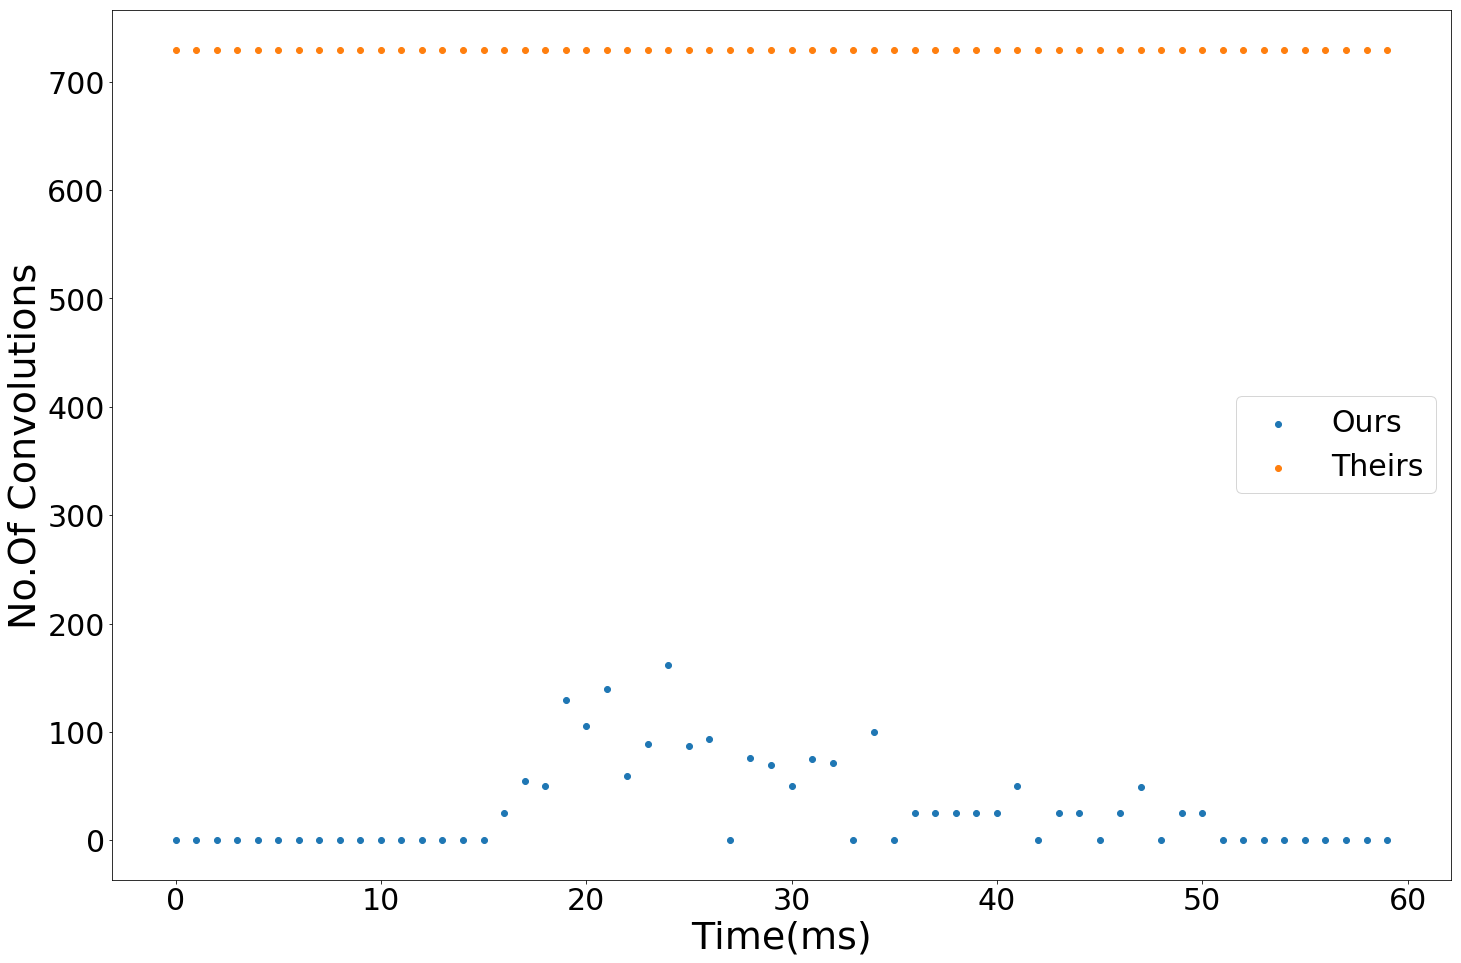

In [80]:
width = 24
height = 16
plt.figure(figsize=(width, height))
Y_axis = convs
X_axis = [i for i in range(len(convs))]
plt.scatter(X_axis,Y_axis,label='Ours')
Y_axis = [729 for i in range(len(convs))]
X_axis = [i for i in range(len(convs))]
plt.scatter(X_axis,Y_axis,label='Theirs')
plt.legend(loc='best',fontsize=30)
plt.xlabel('Time(ms)',fontsize=38)
plt.ylabel('No.Of Convolutions',fontsize=38)
plt.tick_params(axis='x',labelsize=30)
plt.tick_params(axis='y',labelsize=30)
plt.savefig('convols.eps')

# Create a datatype and save the array as binary
The datatype looks like ['i3','i3','i3'], i3 means it's a 32 bit integer, i2 means 16 and so on.

[See](https://www.tutorialspoint.com/numpy/numpy_data_types.htm)

In [2]:
path='/home/ruthvik/Desktop/testdata/'
filename = 'train_sparse_on_array100_Imgs10_mute_rndoff_1_sigma2_k_types_30_tstps.pkl'
output = open(path+filename,'rb')
on_sparse = pickle.load(output)
output.close()

In [27]:
data = []
arr = []
for  i in range(0,40):
    t = i
    nofElems = np.where(on_sparse[:,:,t]>0)[0].size 
    Elems = (27*np.where(on_sparse[:,:,t]>0)[0]+np.where(on_sparse[:,:,t]>0)[1]).tolist()
    arr.append(t)
    arr.append(nofElems)
    arr.extend(Elems)
#t1 = np.array([0,on_sparse[:,:,0].size,np.where(on_sparse[:,:,0]>0)])

In [31]:
arr = np.asarray(arr,dtype='uint32')

In [32]:
arr

array([  0,   0,   1,   0,   2,   0,   3,   0,   4,   0,   5,   0,   6,
         0,   7,   0,   8,   3, 156, 178, 601,   9,   4, 450, 477, 578,
       602,  10,  13, 129, 152, 177, 179, 198, 366, 527, 528, 552, 577,
       600, 603, 627,  11,  12, 130, 151, 157, 171, 174, 175, 199, 200,
       201, 503, 553, 604,  12,  10, 155, 172, 176, 367, 423, 502, 526,
       576, 626, 628,  13,   7, 173, 338, 395, 476, 504, 551, 579,  14,
         6, 197, 310, 365, 394, 501, 529,  15,   6, 170, 282, 337, 451,
       554, 599,  16,   4, 150, 205, 228, 422,  17,   4, 153, 202, 478,
       575,  18,   2, 255, 605,  19,   2, 309, 629,  20,   2, 128, 206,
        21,   1, 149,  22,   2, 449, 500,  23,   2, 227, 525,  24,   1,
       339,  25,   2, 148, 154,  26,   0,  27,   0,  28,   0,  29,   1,
       530,  30,   0,  31,   0,  32,   0,  33,   0,  34,   0,  35,   0,
        36,   0,  37,   0,  38,   0,  39,   0], dtype=uint32)

In [ ]:
filename = 'binary_data_60ms'
arr.tofile(path+filename)

# Read the previously saved binary file(in uint32 mode)

In [62]:
data = path+filename
read_file = open(data,'rb')
dt = np.dtype('uint32')
data=np.fromfile(read_file, dtype=dt)

In [64]:
print(data)
print(len(data))

[  0   0   1   0   2   0   3   0   4   0   5   0   6   0   7   0   8   3
 156 178 601   9   4 450 477 578 602  10  13 129 152 177 179 198 366 527
 528 552 577 600 603 627  11  12 130 151 157 171 174 175 199 200 201 503
 553 604  12  10 155 172 176 367 423 502 526 576 626 628  13   7 173 338
 395 476 504 551 579  14   6 197 310 365 394 501 529  15   6 170 282 337
 451 554 599  16   4 150 205 228 422  17   4 153 202 478 575  18   2 255
 605  19   2 309 629  20   2 128 206  21   1 149  22   2 449 500  23   2
 227 525  24   1 339  25   2 148 154  26   0  27   0  28   0  29   1 530
  30   0  31   0  32   0  33   0  34   0  35   0  36   0  37   0  38   0
  39   0]
164


# Reading data in uint8 mode

In [68]:
data = path+filename
read_file = open(data,'rb')
dt = np.dtype('uint8') ##read as 8 bits
data=np.fromfile(read_file, dtype=dt)

In [69]:
print(data)
print(len(data))

[  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   2   0
   0   0   0   0   0   0   3   0   0   0   0   0   0   0   4   0   0   0
   0   0   0   0   5   0   0   0   0   0   0   0   6   0   0   0   0   0
   0   0   7   0   0   0   0   0   0   0   8   0   0   0   3   0   0   0
 156   0   0   0 178   0   0   0  89   2   0   0   9   0   0   0   4   0
   0   0 194   1   0   0 221   1   0   0  66   2   0   0  90   2   0   0
  10   0   0   0  13   0   0   0 129   0   0   0 152   0   0   0 177   0
   0   0 179   0   0   0 198   0   0   0 110   1   0   0  15   2   0   0
  16   2   0   0  40   2   0   0  65   2   0   0  88   2   0   0  91   2
   0   0 115   2   0   0  11   0   0   0  12   0   0   0 130   0   0   0
 151   0   0   0 157   0   0   0 171   0   0   0 174   0   0   0 175   0
   0   0 199   0   0   0 200   0   0   0 201   0   0   0 247   1   0   0
  41   2   0   0  92   2   0   0  12   0   0   0  10   0   0   0 155   0
   0   0 172   0   0   0 176   0   0   0 111   1   

# Precise Convolutions in full mode(zero padded) at 20th timestep with our algo
Our algorithm pads zeros, so if input is 27x27 then output is also 27x27

In [97]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 27
ker_size = 3
img= A[:,:,20]
ker = np.random.rand(ker_size,ker_size)
result = np.zeros((img_size,img_size))

find_img= find(img)
row_indices_img = find_img[0].tolist()
col_indices_img = find_img[1].tolist()
elems_ip = find_img[2].tolist()
coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

nof_convs=0
prev_convs =[]
for things in coords_ip:
    reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
    zxc = reg.GenRegion().flatten()
    row_indices_img=zxc//img_size
    col_indices_img=zxc%img_size
    coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
    for sub_things in coords_img:
        if(sub_things not in prev_convs):
            prev_convs.append(sub_things) ##noting the points where we generated region and convolved.
            ## some non sparse points whihc are very close might result in redundant number of convolutions.
            reg = regionclass.genregion(img_size*sub_things[0]+sub_things[1],img_size,ker_size)
            asd = reg.GenRegion().flatten()
            row_indices_img=asd//img_size
            col_indices_img=asd%img_size
            coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
            img_vals = []
            for items in coords_img:
                if items not in coords_ip:
                    img_vals.append(0)
                else:
                    img_vals.append(elems_ip[coords_ip.index(items)])
            #print('image coordinates',coords_img)
            #print(sub_things)
            #print(coords_img)
            ker_indices = reg.GenKerRegion().flatten()
            ker_indices.sort()
            row_indices_ker=ker_indices//ker_size
            col_indices_ker=ker_indices%ker_size

            ker_vals=[]
            for ros, cols in zip(row_indices_ker,col_indices_ker):
                #print(ros,cols)
                ker_vals.append(ker[ros][cols])
            a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
            result[sub_things[0]][sub_things[1]]=a_conv
            nof_convs+=1
        
print('Actual number of convs performed:{}'.format(nof_convs))
print('Total number of convs:{}'.format(img_size*img_size))
#print('Inuput matrix\n',img.toarray())
print('Kernel matrix\n',ker)
#print('Sparse Convoltuion is\n',result)


Actual number of convs performed:39
Total number of convs:729
Kernel matrix
 [[0.04050164 0.1006194  0.00177718]
 [0.3227799  0.60012656 0.48662767]
 [0.68998123 0.39309664 0.60605632]]
CPU times: user 7.59 ms, sys: 0 ns, total: 7.59 ms
Wall time: 7.49 ms


# Precise convolutions with zero padded with Scipy

In [98]:
%%time
result1 = signal.correlate(img,ker,mode='same',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!

CPU times: user 933 µs, sys: 58 µs, total: 991 µs
Wall time: 3.05 ms


In [99]:
print('Difference between 2 results:{}'.format((np.absolute(result-result1)).sum()))
print('Sum of result with our algo:{}'.format((np.absolute(result)).sum()))
print('Sum of result with scipy:{}'.format((np.absolute(result1)).sum()))

Difference between 2 results:0.0
Sum of result with our algo:16.207832703242005
Sum of result with scipy:16.207832703242005


# Resulting array from scipy and our algo(both in full mode)

In [100]:
print('Resulting array from our algorithm')
print(result)
print('Resulting array from SciPy algorithm\n')
print(result1)

Resulting array from our algorithm
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

# Resulting array from scipy convolution in valid mode
in valid mode if input is 27x27 and the kernel is 3x3 the resultant is 25x25. Our algorithm that I implemented in python can only do full mode not valid mode

In [101]:
%%time
result2 = signal.correlate(img,ker,mode='valid',method='direct') ##DON'T USE SIGNAL.CONVOLVE!!!

CPU times: user 224 µs, sys: 18 µs, total: 242 µs
Wall time: 251 µs


In [108]:
print('Difference between 2 results:{}'.format(np.absolute(result).sum()-np.absolute(result2).sum()))
print('Sum of result with our algo in full mode:{}'.format(np.absolute(result).sum()))
print('Sum of result with scipy in valid mode:{}'.format(np.absolute(result2).sum()))
print('Shape of resultant array is:{}'.format(result2.shape))

Difference between 2 results:0.0
Sum of result with our algo in full mode:16.207832703242005
Sum of result with scipy in valid mode:16.207832703242005
Shape of resultant array is:(25, 25)


Note that since the input array are very sparse the result will not vary much if you use valid or full modes. 

# Resulting array from scipy ( in valid mode)

In [109]:
print('Resulting array from SciPy in valid mode\n')
print(result2)

Resulting array from SciPy in valid mode

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0. 

# Recording Number of convolutions over 60 timesteps with a 3x3 kernel

In [83]:
%%time
from scipy import sparse
from numpy.random import RandomState
import regionclass
img_size = 27
ker_size = 3
convs = []
for times in range(60):
    img= A[:,:,times]
    ker = np.random.rand(ker_size,ker_size)
    result = np.zeros((img_size,img_size))

    find_img= find(img)
    row_indices_img = find_img[0].tolist()
    col_indices_img = find_img[1].tolist()
    elems_ip = find_img[2].tolist()
    coords_ip = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]

    nof_convs=0
    prev_convs =[]
    for things in coords_ip:
        reg = regionclass.genregion(img_size*things[0]+things[1],img_size,ker_size)
        row_indices_img=reg.GenRegion().flatten()//img_size
        col_indices_img=reg.GenRegion().flatten()%img_size
        coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
        for sub_things in coords_img:
            if(sub_things not in prev_convs):
                prev_convs.append(sub_things) ##noting the points where we generated region and convolved.
                ## some non sparse points whihc are very close might result in redundant number of convolutions.
                reg = regionclass.genregion(img_size*sub_things[0]+sub_things[1],img_size,ker_size)
                row_indices_img=reg.GenRegion().flatten()//img_size
                col_indices_img=reg.GenRegion().flatten()%img_size
                coords_img = [(row_indices_img[i],col_indices_img[i]) for i in range(len(row_indices_img))]
                img_vals = []
                for items in coords_img:
                    if items not in coords_ip:
                        img_vals.append(0)
                    else:
                        img_vals.append(elems_ip[coords_ip.index(items)])
                #print('image coordinates',coords_img)
                #print(sub_things)
                #print(coords_img)
                ker_indices = reg.GenKerRegion().flatten()
                ker_indices.sort()
                row_indices_ker=ker_indices//ker_size
                col_indices_ker=ker_indices%ker_size

                ker_vals=[]
                for ros, cols in zip(row_indices_ker,col_indices_ker):
                    #print(ros,cols)
                    ker_vals.append(ker[ros][cols])
                a_conv = (np.asarray(img_vals)*np.asarray(ker_vals)).sum()
                result[sub_things[0]][sub_things[1]]=a_conv
                nof_convs+=1
    convs.append(nof_convs)
        


CPU times: user 73.9 ms, sys: 0 ns, total: 73.9 ms
Wall time: 74 ms


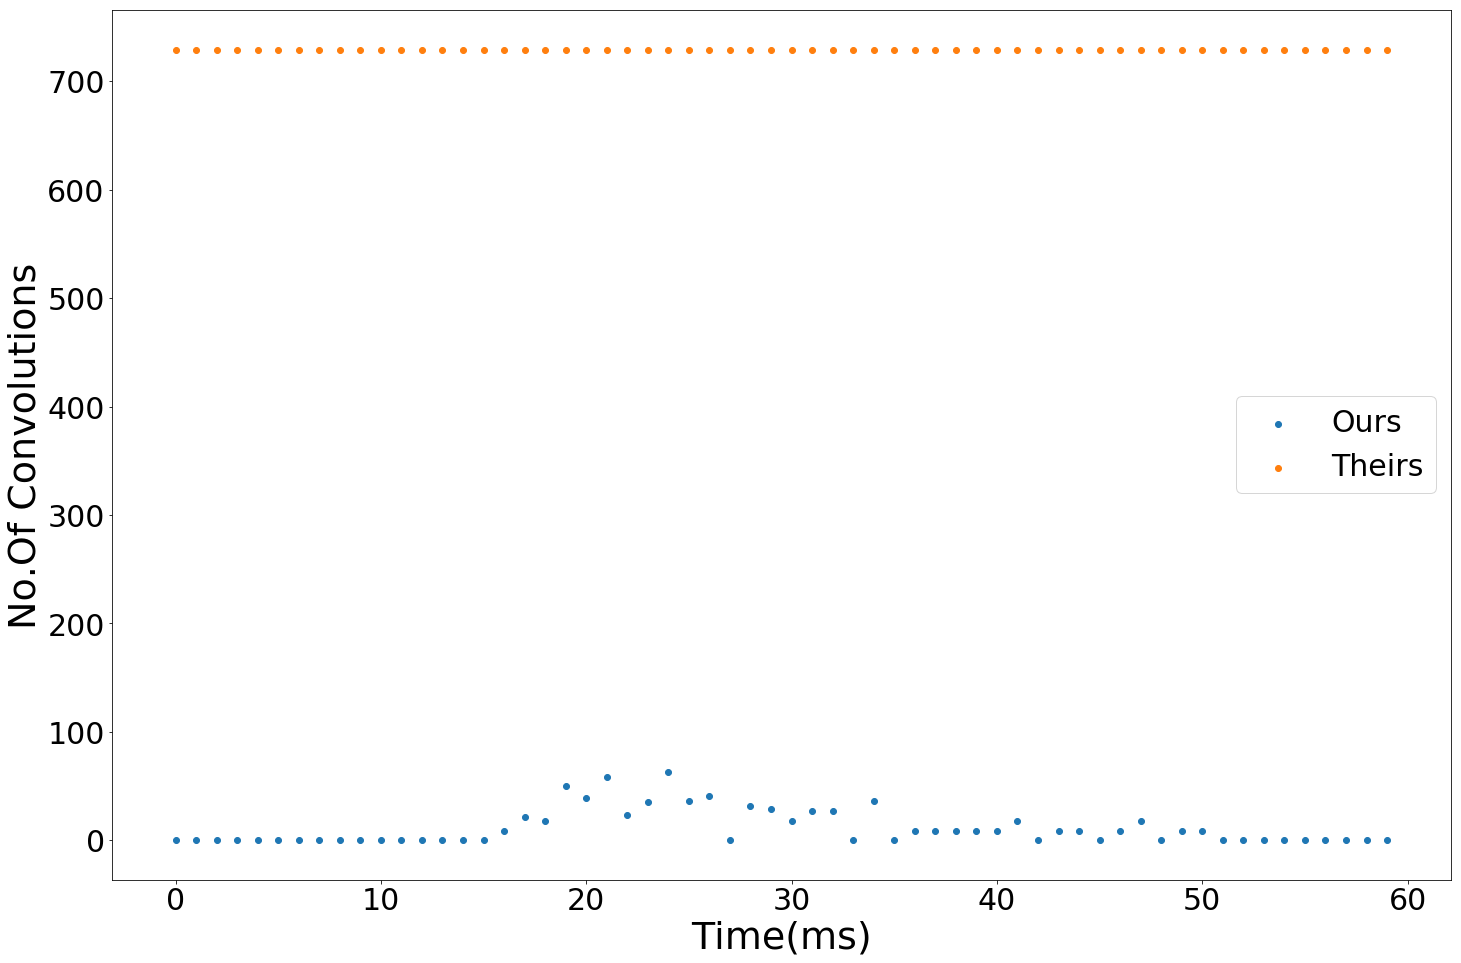

In [84]:
width = 24
height = 16
plt.figure(figsize=(width, height))
Y_axis = convs
X_axis = [i for i in range(len(convs))]
plt.scatter(X_axis,Y_axis,label='Ours')
Y_axis = [729 for i in range(len(convs))]
X_axis = [i for i in range(len(convs))]
plt.scatter(X_axis,Y_axis,label='Theirs')
plt.legend(loc='best',fontsize=30)
plt.xlabel('Time(ms)',fontsize=38)
plt.ylabel('No.Of Convolutions',fontsize=38)
plt.tick_params(axis='x',labelsize=30)
plt.tick_params(axis='y',labelsize=30)
plt.savefig('convols.eps')

# Pooling in tensorflow
[See](https://www.tensorflow.org/tutorials/layers) for an example of CNN

In [57]:
image = np.arange(5*5*4).reshape(1,5, 5, 4)
image = tf.constant(image)
print('Shape of input image:{}'.format(image.shape))
print('first slice is:\n{}'.format(sess.run(image[0,:,:,0])))
print('second slice is:\n{}'.format(sess.run(image[0,:,:,1])))
print('last slice is:\n{}'.format(sess.run(image[0,:,:,-1])))
pool1 = tf.layers.max_pooling2d(inputs=image, pool_size=[2, 2], strides=2)
print('result of pooling:\n{}'.format(sess.run(pool1)))
print('Shape of resultant pooling:{}'.format(pool1.shape))
print('result of max pooling on first slice:\n{}'.format(sess.run(pool1[0,:,:,0])))
print('result of max pooling on second slice:\n{}'.format(sess.run(pool1[0,:,:,1])))
print('result of max pooling on last slice:\n{}'.format(sess.run(pool1[0,:,:,-1])))

Shape of input image:(1, 5, 5, 4)
first slice is:
[[ 0  4  8 12 16]
 [20 24 28 32 36]
 [40 44 48 52 56]
 [60 64 68 72 76]
 [80 84 88 92 96]]
second slice is:
[[ 1  5  9 13 17]
 [21 25 29 33 37]
 [41 45 49 53 57]
 [61 65 69 73 77]
 [81 85 89 93 97]]
last slice is:
[[ 3  7 11 15 19]
 [23 27 31 35 39]
 [43 47 51 55 59]
 [63 67 71 75 79]
 [83 87 91 95 99]]
result of pooling:
[[[[24 25 26 27]
   [32 33 34 35]]

  [[64 65 66 67]
   [72 73 74 75]]]]
Shape of resultant pooling:(1, 2, 2, 4)
result of max pooling on first slice:
[[24 32]
 [64 72]]
result of max pooling on second slice:
[[25 33]
 [65 73]]
result of max pooling on last slice:
[[27 35]
 [67 75]]


# Using Tensorflow to convolve an input 2D tensor with a 3D weight tensor
Above(on very top) we showed how to convolve an input 3D tensor with a 3D weight tensor and on the cell above we showed how to do pooling.

In [49]:
image = np.arange(11*11*1).reshape((11,11))
kernel1 = np.arange(5*5*4).reshape((5,5,4))


in_channels = 1 # 1 because our image has 1 units in the -z direction. 
out_channels = 4
ones_3d = image # input is 2d, in_channels = 1
weight_3d = kernel1
strides_2d = [1, 1, 1, 1]

in_3d = tf.constant(ones_3d, dtype=tf.float32)
filter_3d = tf.constant(weight_3d, dtype=tf.float32)

in_width = int(in_3d.shape[0])
in_height = int(in_3d.shape[1])

filter_width = int(filter_3d.shape[0])
filter_height = int(filter_3d.shape[1])

input_3d   = tf.reshape(in_3d, [1, in_height, in_width, in_channels])
kernel_3d = tf.reshape(filter_3d, [filter_height, filter_width, in_channels, out_channels])
inter = tf.nn.conv2d(input_3d, kernel_3d, strides=strides_2d, padding='VALID')
print(inter.shape)
output_2d = tf.squeeze(inter)
print(sess.run(output_2d))
print(output_2d.shape)

(1, 7, 7, 4)
[[[ 40000.  40600.  41200.  41800.]
  [ 41200.  41825.  42450.  43075.]
  [ 42400.  43050.  43700.  44350.]
  [ 43600.  44275.  44950.  45625.]
  [ 44800.  45500.  46200.  46900.]
  [ 46000.  46725.  47450.  48175.]
  [ 47200.  47950.  48700.  49450.]]

 [[ 53200.  54075.  54950.  55825.]
  [ 54400.  55300.  56200.  57100.]
  [ 55600.  56525.  57450.  58375.]
  [ 56800.  57750.  58700.  59650.]
  [ 58000.  58975.  59950.  60925.]
  [ 59200.  60200.  61200.  62200.]
  [ 60400.  61425.  62450.  63475.]]

 [[ 66400.  67550.  68700.  69850.]
  [ 67600.  68775.  69950.  71125.]
  [ 68800.  70000.  71200.  72400.]
  [ 70000.  71225.  72450.  73675.]
  [ 71200.  72450.  73700.  74950.]
  [ 72400.  73675.  74950.  76225.]
  [ 73600.  74900.  76200.  77500.]]

 [[ 79600.  81025.  82450.  83875.]
  [ 80800.  82250.  83700.  85150.]
  [ 82000.  83475.  84950.  86425.]
  [ 83200.  84700.  86200.  87700.]
  [ 84400.  85925.  87450.  88975.]
  [ 85600.  87150.  88700.  90250.]
  [ 86800

# Using SciPy to convolve an input 2D tensor with a 3D weight tensor


In [45]:
output = np.zeros((7,7,4))
image = np.arange(11*11).reshape((11,11))
for i in range(kernel1.shape[-1]):
    output[:,:,i]=signal.correlate(image,kernel1[:,:,i],mode='valid',method='fft')
print(output.shape)
print(output)

(7, 7, 4)
[[[ 40000.  40600.  41200.  41800.]
  [ 41200.  41825.  42450.  43075.]
  [ 42400.  43050.  43700.  44350.]
  [ 43600.  44275.  44950.  45625.]
  [ 44800.  45500.  46200.  46900.]
  [ 46000.  46725.  47450.  48175.]
  [ 47200.  47950.  48700.  49450.]]

 [[ 53200.  54075.  54950.  55825.]
  [ 54400.  55300.  56200.  57100.]
  [ 55600.  56525.  57450.  58375.]
  [ 56800.  57750.  58700.  59650.]
  [ 58000.  58975.  59950.  60925.]
  [ 59200.  60200.  61200.  62200.]
  [ 60400.  61425.  62450.  63475.]]

 [[ 66400.  67550.  68700.  69850.]
  [ 67600.  68775.  69950.  71125.]
  [ 68800.  70000.  71200.  72400.]
  [ 70000.  71225.  72450.  73675.]
  [ 71200.  72450.  73700.  74950.]
  [ 72400.  73675.  74950.  76225.]
  [ 73600.  74900.  76200.  77500.]]

 [[ 79600.  81025.  82450.  83875.]
  [ 80800.  82250.  83700.  85150.]
  [ 82000.  83475.  84950.  86425.]
  [ 83200.  84700.  86200.  87700.]
  [ 84400.  85925.  87450.  88975.]
  [ 85600.  87150.  88700.  90250.]
  [ 86800.  